In [1]:
!nvidia-smi

Wed Aug 18 01:42:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip list | grep torch

torch                         1.9.0+cu102
torchsummary                  1.5.1
torchtext                     0.10.0
torchvision                   0.10.0+cu102


In [4]:
import torch
import numpy as np

In [5]:
## 여러가지 기본 함수들

In [6]:
# torch의 arange
nums = torch.arange(9)

# torch의 shape
nums.shape

# torch의 numpy array
nums.numpy()

# torch의 reshape (.view()와 비슷)
nums.reshape(3,3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [7]:
## 랜덤 행렬

In [8]:
randoms = torch.rand((3,3))
randoms

tensor([[0.1895, 0.2743, 0.5687],
        [0.2434, 0.8150, 0.4481],
        [0.4228, 0.4968, 0.5000]])

In [9]:
## 영행렬, 1인 행렬 만들기

In [10]:
zeros = torch.zeros((3,3))
zeros

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [11]:
ones = torch.ones((3,3))
ones

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [12]:
torch.zeros_like(ones)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [13]:
zeros.shape

torch.Size([3, 3])

In [14]:
nums * 3

tensor([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

In [15]:
nums = nums.reshape((3,3))

In [16]:
nums + nums

tensor([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16]])

In [17]:
## 연산 하기

In [18]:
result = torch.add(nums, 10)
result

tensor([[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]])

In [19]:
## 쉐입 바꾸기

In [20]:
range_nums = torch.arange(9).reshape((3,3))
range_nums

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [21]:
result.numpy()

array([[10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

In [22]:
range_nums.view(-1)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [23]:
range_nums.view(1,9)

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8]])

In [24]:
## 슬라이싱

In [25]:
nums[1]

tensor([3, 4, 5])

In [26]:
nums[1,1]

tensor(4)

In [27]:
nums[1:]

tensor([[3, 4, 5],
        [6, 7, 8]])

In [28]:
nums[1:, 1:]

tensor([[4, 5],
        [7, 8]])

In [29]:
## torch로 tensor 만들기

In [30]:
arr = np.array([1, 1, 1])
arr

array([1, 1, 1])

In [31]:
arr_torch = torch.from_numpy(arr)
arr_torch

tensor([1, 1, 1])

In [32]:
## 형태 변환

In [33]:
arr_torch.float()

tensor([1., 1., 1.])

In [34]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [35]:
# gpu 연산할 때 gpu로 보내는 방법
arr_torch.to(device)

tensor([1, 1, 1], device='cuda:0')

In [36]:
# 연산하고 다시 cpu로
arr_torch.to('cpu')

tensor([1, 1, 1])

In [37]:
# required_grad = True -> grad 계산할 때 업데이트를 하겠다는 것
x = torch.ones(2,2, requires_grad=True)

In [38]:
y = x+2

In [39]:
z = y*y*3
out = z.mean()

In [40]:
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [41]:
# out에 대한 x의 grad 구하기
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [42]:
x.requires_grad

True

In [43]:
y.requires_grad

True

In [44]:
# no_grad는 grad를 계산하지 않은 채 가져옴
with torch.no_grad():
    print((x**2).requires_grad)

False


In [45]:
from torchvision import datasets, transforms

In [46]:
batch_size = 32
test_batch_size = 32

In [47]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=True, download=True,
                   transform = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize(mean=(0.5, ), std=(0.5, ))
                   ])),
                   batch_size=batch_size,
                   shuffle=True

)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [48]:
images, labels = next(iter(train_loader))

In [49]:
images.shape

torch.Size([32, 1, 28, 28])

In [50]:
labels.shape

torch.Size([32])

In [51]:
import matplotlib.pyplot as plt

In [52]:
images[0].shape

torch.Size([1, 28, 28])

In [53]:
# 차원 1인 것 날려줌
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [54]:
image = torch_image.numpy()
image.shape

(28, 28)

In [55]:
label = labels[0].numpy()

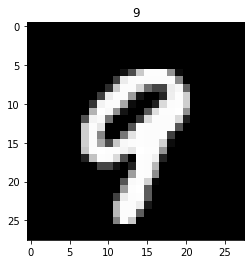

In [56]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()

In [57]:
## NN은 neural network
## funcional은 함수 중 w와 관련 없는 것들
import torch.nn as nn
import torch.nn.functional as F

In [58]:
# in은 들어오는 채널, out은 나가는 것인데 out의 경우 filter 수를 의미함
layer = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1).to(device)

In [59]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [60]:
weight = weight.cpu().detach().numpy()
weight.shape

(20, 1, 5, 5)

In [61]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def cmap_map(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # Firt get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector

    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

In [62]:
light_jet = cmap_map(lambda x: x/2 + 0.5, matplotlib.cm.jet)

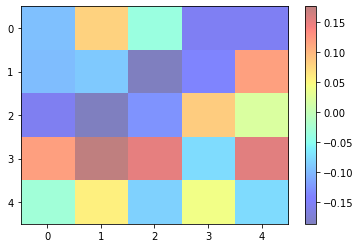

In [63]:
plt.imshow(weight[0, 0, :, :], cmap=light_jet, aspect='auto')
plt.colorbar()
plt.show()

In [64]:
output_data = layer(images.to(device))

In [65]:
output_data = output_data.data

In [66]:
output_data.shape

torch.Size([32, 20, 24, 24])

In [67]:
# grad가 있으면 depatch 없으면 그냥 numpy로 받아오면 ㄷㅚㅁ
output = output_data.cpu().numpy()

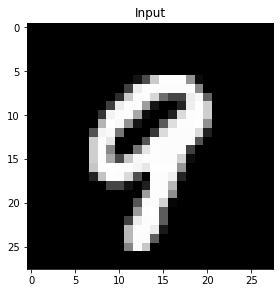

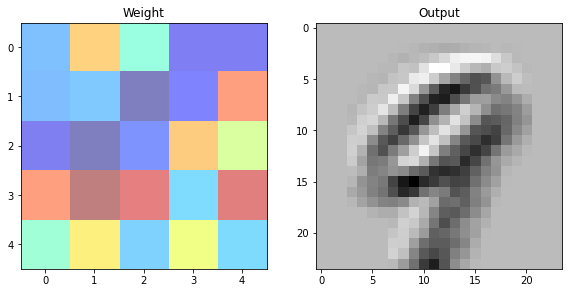

In [68]:
plt.figure(figsize=(15,30))
plt.subplot(131)
plt.title('Input')
plt.imshow(image, 'gray')

plt.figure(figsize=(15,30))
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:], light_jet)

plt.subplot(133)
plt.title('Output')
plt.imshow(output[0, 0, :, :], 'gray')
plt.show()

In [69]:
pool = F.max_pool2d(output_data, 2, 2)
pool.shape

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


torch.Size([32, 20, 12, 12])

In [70]:
pool_arr=pool.cpu().numpy()

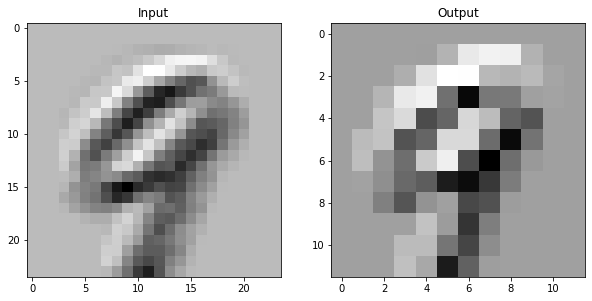

In [71]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.title('Input')
plt.imshow(output[0,0,:,:], 'gray')

plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0,0,:,:], 'gray')

plt.show()

In [72]:
flatten = pool.view(32, -1, 12*12)

In [73]:
# Dense와 같음
lin = nn.Linear(144, 10).to(device)(flatten)

In [74]:
lin[0,0,:]

tensor([-0.7902,  0.3467, -0.0066,  0.1049, -0.1258,  0.2145,  0.0645, -0.1383,
         1.0472,  0.0994], device='cuda:0', grad_fn=<SliceBackward>)

<function matplotlib.pyplot.show>

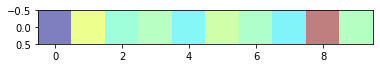

In [75]:
# lin은 weight를 가지고 있으니 detatch
# unqueeze는 squeeze의 반대로 차원 추가해줌
plt.imshow(lin[0,0,:].unsqueeze(0).cpu().detach().numpy(), light_jet)
plt.show

In [76]:
with torch.no_grad():
    softmax = F.softmax(lin, dim=-1)
softmax[0, 0, :]
np.sum(softmax[0, 0, :].cpu().numpy())

0.99999994

In [77]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(50*4*4, 500)
        self.fc2 = nn.Linear(500, 10)

    # keras call과 같음
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        
        x = x.view(-1, 50*4*4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return F.log_softmax(x, dim=1)

In [78]:
model = Net()
model.to(device)

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [79]:
import torch.optim as optim

In [80]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.5)

In [81]:
data, target = next(iter(train_loader))

In [82]:
data.shape, target.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [83]:
epochs = 2
log_interval = 100

In [84]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=False, download = True, 
                   transform = transforms.Compose([
                                                    transforms.ToTensor(),
                                                    transforms.Normalize(mean=(0.5,), std = (0.5,))
                   ])),
                   batch_size = batch_size,
                   shuffle = True
)

In [85]:
for epoch in range(1, epochs + 1):
    model.train()

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset), 
                100 * batch_idx / len(train_loader), loss.item()
            ))

    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average Loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), 100 * correct / len(test_loader.dataset)
    ))


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.294277
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.287701
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.283425
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.247485
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.231314
Train Epoch: 1 [16000/60000 (27%)]	Loss: 2.164892
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.112379
Train Epoch: 1 [22400/60000 (37%)]	Loss: 2.024722
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.844451
Train Epoch: 1 [28800/60000 (48%)]	Loss: 1.698006
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.441098
Train Epoch: 1 [35200/60000 (59%)]	Loss: 1.325219
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.102663
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.785075
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.730951
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.673497
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.828588
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.552146
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.498462

Test set: Average Loss: 0.4650, Accuracy: 8769/10000 (88%)